# Austrian Ski Resorts
This projects aims to scrape data from bergfex.at to tabulate data on Austrian ski resorts, their prices, mountain heights, and length of slopes, and therefore to allow for some basic descriptives on the Austrian ski resorts.

In [2]:
# import some common libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

pd.options.display.max_rows = 400

# 1. Scrape information from bergfex.at

### First, let's create a list with the urls of each Austrian ski resort on bergfex.

In [2]:
# Lists on all skiresorts can be retrieved from the county-specific pages on bergfex
county_urls = ["https://www.bergfex.at/tirol/", "https://www.bergfex.at/salzburg/",
               "https://www.bergfex.at/steiermark/", "https://www.bergfex.at/vorarlberg/",
               "https://www.bergfex.at/kaernten/", "https://www.bergfex.at/oberoesterreich/",
               "https://www.bergfex.at/niederoesterreich/"]

In [3]:
# From every county_url, retrieve the ski resort-specific ending that makes up the resort-specific url
ending_dict = {}
for k, url in enumerate(county_urls):
    quote_page = url
    page = urlopen(quote_page)
    soup = BeautifulSoup(page, "html.parser")
    divsoup = soup.find("div", {"class" : "section-left"})
    endings = [] # add all endings on page into a list
    for link in divsoup.find_all("a", href=True):
        endings.append(link["href"])
    ending_dict[k] = endings
    print("finished county ", k+1," out of ", len(county_urls))
ending_dict

finished county  1  out of  7
finished county  2  out of  7
finished county  3  out of  7
finished county  4  out of  7
finished county  5  out of  7
finished county  6  out of  7
finished county  7  out of  7


{0: ['/oesterreich/',
  '/oesterreich/suchen/',
  '',
  '/achensee/',
  '/alpbachtal/',
  '/astenberg-wiesing/',
  '/axamer-lizum/',
  '/pillersee-hochfilzen/',
  '/bergeralm/',
  '/berwang/',
  '/biberwier/',
  '/birgitz/',
  '/boden-bschlabs/',
  '/brandlift-scharnitz/',
  '/brixen/',
  '/burglift-stans/',
  '/christlum/',
  '/dorfberglift-kartitsch/',
  '/eggalm/',
  '/wettersteinbahnen-ehrwald/',
  '/ehrwald/',
  '/stubaital-neustift/',
  '/ellmau/',
  '/fendels/',
  '/fieberbrunn/',
  '/fuegen-spieljoch/',
  '/fuessener-joechle-graen/',
  '/galtuer/',
  '/haberllifte/',
  '/gerlos/',
  '/gerlosstein/',
  '/glungezer/',
  '/going/',
  '/gramais/',
  '/skigebiet-gries-laengenfeld/',
  '/gruenberg-obsteig/',
  '/haeselgehr/',
  '/hinterfeldlift-moesern/',
  '/hintertux/',
  '/hochfeldlift-schwoich/',
  '/hochfuegen/',
  '/koessen/',
  '/hochzeiger/',
  '/hochzillertal/',
  '/holzgau/',
  '/hopfgarten/',
  '/huettegglift/',
  '/imst/',
  '/innsbruck-nordkette/',
  '/innsbruck-igls-pat

In [12]:
# generate final list of urls
ending_list = []
for key in ending_dict:
    clean_list=ending_dict[key][3:] #on every county-page, the first 3 endings do not point to specific resorts
    ending_list += clean_list

ending_list.remove('/test/') #this ending would not lead to ski resort

urls = ["https://www.bergfex.at"+ending for ending in ending_list] #generate final urls of ski resorts on bergfex
print(len(urls))
urls

381


['https://www.bergfex.at/achensee/',
 'https://www.bergfex.at/alpbachtal/',
 'https://www.bergfex.at/astenberg-wiesing/',
 'https://www.bergfex.at/axamer-lizum/',
 'https://www.bergfex.at/pillersee-hochfilzen/',
 'https://www.bergfex.at/bergeralm/',
 'https://www.bergfex.at/berwang/',
 'https://www.bergfex.at/biberwier/',
 'https://www.bergfex.at/birgitz/',
 'https://www.bergfex.at/boden-bschlabs/',
 'https://www.bergfex.at/brandlift-scharnitz/',
 'https://www.bergfex.at/brixen/',
 'https://www.bergfex.at/burglift-stans/',
 'https://www.bergfex.at/christlum/',
 'https://www.bergfex.at/dorfberglift-kartitsch/',
 'https://www.bergfex.at/eggalm/',
 'https://www.bergfex.at/wettersteinbahnen-ehrwald/',
 'https://www.bergfex.at/ehrwald/',
 'https://www.bergfex.at/stubaital-neustift/',
 'https://www.bergfex.at/ellmau/',
 'https://www.bergfex.at/fendels/',
 'https://www.bergfex.at/fieberbrunn/',
 'https://www.bergfex.at/fuegen-spieljoch/',
 'https://www.bergfex.at/fuessener-joechle-graen/',
 '

In [13]:
# lists that shall be filled with information from the websites
name = [] #name of ski resort
regions = [] # Austrian county to which ski resort belongs
hills = [] #lowest and highest point of ski resort
season = [] #beginning and ending of ski season
easy_km = [] # kilometers of easy (blue) slopes
medium_km = [] # kilometers of medium (red) slopes
hard_km = [] # kilometers of difficult (black) slopes
freeride_km = [] # kilometers of freeride slopes
total_km = [] # total kilometers slopes
ratings = [] # average rating of ski resort from bergfex visitors
rating_count = [] # number of people who rated ski resort
prices = [] # price for one-day ski pass

### Scrape pages and put information into respective lists

In [14]:
%%time
for ix, url in enumerate(urls):
    html = urlopen(url)
    soup = BeautifulSoup(html, "html.parser")
    if soup.find("div", {"class" : "heading-container"}) == None: # some pages do not provide information on ski resort
        continue
    region = soup.find("a",{"class":"region"})
    regions.append(region.text) # scrape county
    header = soup.find("header")
    name.append(header.find("h1").text) # scrape name of resort
    overview = soup.find("div", {"class" : "heading-container"})
    hills.append(overview.find("h3").text) #scrape lowest and highest point of ski resort
    infos = soup.find("div", {"class" : "section-right"})
    season.append(infos.find("span", {"class" : "important"}).text) # scrape beginning and ending of ski season
    slopes = infos.find("dl", {"class" : "dd-dense"}) # scrape slope kilometers
    leicht = slopes.find("dd") 
    mittel = leicht.find_next("dd")
    schwer = mittel.find_next("dd")
    routen = schwer.find_next("dd")
    gesamt = routen.find_next("dd")
    easy_km.append(leicht.text) 
    medium_km.append(mittel.text)
    hard_km.append(schwer.text)
    freeride_km.append(routen.text)
    total_km.append(gesamt.text)
    rating = soup.find("span", {"class" : "rating-number"})
    ratings.append(rating.text) # scrape rating
    rating_c = soup.find("span", {"class":"rating-count"})
    rating_count.append(rating_c.text) # scrape rating count
    price_url = url+"preise/" # generate url for price page
    price_page = urlopen(price_url)
    price_soup = BeautifulSoup(price_page, "html.parser")
    one_day = price_soup.find("tr",{"class":"PreiseTyp_1Tag"})
    if one_day == None:
        price = "-"
    else:
        price = one_day.find("td", {"class":"PreisgruppenTyp_1"}).text
    prices.append(price) # scrape price for one-day ski pass
    print("Websites scraped: ", ix+1, " out of ", len(urls))

Websites scraped:  1  out of  381
Websites scraped:  2  out of  381
Websites scraped:  3  out of  381
Websites scraped:  4  out of  381
Websites scraped:  5  out of  381
Websites scraped:  6  out of  381
Websites scraped:  7  out of  381
Websites scraped:  8  out of  381
Websites scraped:  10  out of  381
Websites scraped:  11  out of  381
Websites scraped:  12  out of  381
Websites scraped:  13  out of  381
Websites scraped:  14  out of  381
Websites scraped:  15  out of  381
Websites scraped:  16  out of  381
Websites scraped:  17  out of  381
Websites scraped:  18  out of  381
Websites scraped:  19  out of  381
Websites scraped:  20  out of  381
Websites scraped:  21  out of  381
Websites scraped:  22  out of  381
Websites scraped:  23  out of  381
Websites scraped:  24  out of  381
Websites scraped:  25  out of  381
Websites scraped:  26  out of  381
Websites scraped:  27  out of  381
Websites scraped:  28  out of  381
Websites scraped:  29  out of  381
Websites scraped:  30  out o

Websites scraped:  236  out of  381
Websites scraped:  237  out of  381
Websites scraped:  238  out of  381
Websites scraped:  239  out of  381
Websites scraped:  240  out of  381
Websites scraped:  241  out of  381
Websites scraped:  242  out of  381
Websites scraped:  243  out of  381
Websites scraped:  244  out of  381
Websites scraped:  245  out of  381
Websites scraped:  246  out of  381
Websites scraped:  247  out of  381
Websites scraped:  248  out of  381
Websites scraped:  249  out of  381
Websites scraped:  250  out of  381
Websites scraped:  251  out of  381
Websites scraped:  252  out of  381
Websites scraped:  253  out of  381
Websites scraped:  254  out of  381
Websites scraped:  255  out of  381
Websites scraped:  256  out of  381
Websites scraped:  257  out of  381
Websites scraped:  258  out of  381
Websites scraped:  259  out of  381
Websites scraped:  260  out of  381
Websites scraped:  261  out of  381
Websites scraped:  263  out of  381
Websites scraped:  264  out 

In [15]:
for info in [name,
regions,
hills,
season,
easy_km,
medium_km,
hard_km,
freeride_km,
total_km,
ratings,
rating_count,
prices]:
    print(len(info)) #check number of elements in each list

374
374
374
374
374
374
374
374
374
374
374
374


# 2. Create Pandas Dataframe and clean columns

In [16]:
resorts = pd.DataFrame(columns=['name', 'regions', 'hills', 'season', 'easy',
                                'medium', 'difficult', 'freeride',
                                'total','rating','rating_count','prices'])
resorts.name = name
resorts.hills = hills
resorts.season = season
resorts.easy = easy_km
resorts.medium = medium_km
resorts.difficult = hard_km
resorts.freeride = freeride_km
resorts.total = total_km
resorts.rating = ratings
resorts.rating_count = rating_count
resorts.prices = prices
resorts.regions = regions

In [18]:
resorts.head()

,name,regions,hills,season,easy,medium,difficult,freeride,total,rating,rating_count,prices
0,Skigebiet Achensee\n,Tirol,940 - 1.800m,14.12.2018 - 31.03.2019,16 km,30 km,7 km,k.A.\n,53 km,"4,0",157,-
1,Skigebiet Alpbach - Ski Juwel Alpbachtal Wilds...,Tirol,650 - 2.025m,07.12.2018 - 22.04.2019,26 km,54 km,13 km,16 km,109 km,"4,4",413,"\n€ 47,50\n"
2,Skigebiet Astenberg / Wiesing - Achensee\n,Tirol,600 - 900m,08.01.2019 - 28.02.2019,1 km,k.A.\n,k.A.\n,k.A.\n,1 km,"2,9",19,-
3,Skigebiet Axamer Lizum\n,Tirol,1.583 - 2.340m,01.12.2018 - 22.04.2019,7 km,21 km,2 km,11 km,41 km,"4,1",378,"\n€ 39,50\n"
4,Skigebiet Bergbahn Pillersee – Buchensteinwand\n,Tirol,855 - 1.456m,15.12.2018 - 31.03.2019,10 km (6),7 km (7),5 km (2),"2,5 km",22 km,"4,0",102,"\n€ 36,00\n"


###  Clean ski resort names

In [19]:
resorts.name = resorts.name.str.replace("Skigebiet", "")
resorts.name = resorts.name.str.strip()
resorts.name = resorts.name.str.replace("Ã¶","oe")
resorts.name = resorts.name.str.replace("â€“","-")
resorts.name = resorts.name.str.replace("Ã¼","ue")
resorts.name = resorts.name.str.replace("Ã¤","ae")
resorts.name = resorts.name.str.replace("ÃŸ","ss")
resorts.regions = resorts.regions.str.replace("Ã¶","oe")
resorts.regions = resorts.regions.str.replace("Ã¤","ae")
resorts.regions = resorts.regions.str.replace("ä","ae")
resorts.regions = resorts.regions.str.replace("ö","oe")
resorts.regions = resorts.regions.str.replace("â€“","-")
resorts.regions = resorts.regions.str.replace("ÃŸ","ss")

In [22]:
resorts["name"].value_counts()

Panoramabahn Kitzbüheler Alpen - Mittersill                 2
Zauberberg Semmering - Hirschenkogel                        2
Weinebene                                                   2
Katschberg                                                  2
Turracher Höhe                                              2
Sportgastein - Ski amade                                    1
Feuerkogel - Ebensee                                        1
Wildkogel-Arena - Neukirchen Bramberg                       1
Falkert HEIDI ALM BergResort                                1
Schattwald - Zöblen im Tannheimertal                        1
Annaberg - Lungötz - Dachstein West                         1
Aichelberglifte Karlstift                                   1
Waldzell                                                    1
Tiroler Zugspitzbahn                                        1
Sölden                                                      1
Afiesl                                                      1
Skilift 

### Clean hill column and create two columns for valley and top point

In [23]:
resorts.hills = resorts.hills.str.replace(".", "")
resorts.hills = resorts.hills.str.replace("m", "")

In [24]:
#display rows with missing top or valley information

missing_hills = resorts["hills"].str.contains("-")
print(resorts[missing_hills==False])

                          name          regions hills  \
133  Grossglockner - Zellersee  Salzburger Land   758   
277         Skilift Hittisberg       Vorarlberg   800   

                      season    easy   medium difficult freeride   total  \
133  30.11.2018 - 22.04.2019  57 km    49 km     32 km    k.A.\n  139 km   
277  05.01.2019 - 18.03.2019  k.A.\n  0,9 km     k.A.\n   k.A.\n  0,9 km   

    rating rating_count       prices  
133    4,0           97  \n€ 12,00\n  
277    3,3           14  \n€ 16,50\n  


In [ ]:
#two resorts only provide information on one point: set as valley point

valley = []
top = []
for i in resorts.hills:
    if "-" not in i:
        valley.append(i)
        top.append("")
    else:
        valley.append(i.split(" - ")[0])
        top.append(i.split(" - ")[1])
print(len(valley), len(top))
resorts['valley'] = pd.Series(valley)
resorts['top'] = pd.Series(top)
resorts['valley'] = resorts['valley'].astype(int)
resorts['top'] = pd.to_numeric(resorts['top'], errors='coerce')
resorts = resorts.drop(columns=["hills"])

### Clean season column and extract season start and season end as separate columns

In [26]:
season_start = [i.split(" - ")[0] for i in resorts.season]
season_end = [i.split(" - ")[1] for i in resorts.season]
resorts["season_start"] = season_start
resorts["season_end"] = season_end
resorts["season_start"] = pd.to_datetime(resorts["season_start"], dayfirst=True)
resorts["season_end"] = pd.to_datetime(resorts["season_end"],dayfirst=True)
resorts = resorts.drop(columns=["season"])

### Clean columns on length of slopes

In [3]:
#clean columns on lenght of slopes (slopes km)
for col in ["easy","medium","difficult","freeride","total"]:
    resorts[col] = resorts[col].str.replace("km","")
    resorts[col] = resorts[col].str.replace(",",".")
    resorts[col] = resorts[col].str.replace("k.A.","")
    resorts[col] = resorts[col].str.replace(r"\(.*\)","")
    resorts[col] = resorts[col].str.strip()
    resorts[col] = resorts[col].replace("",np.NaN)
    resorts[col] = pd.to_numeric(resorts[col], errors='coerce')
    print(resorts[col].describe())


count    348.000000
mean      14.657471
std       27.735918
min        0.100000
25%        1.150000
50%        5.000000
75%       13.050000
max      140.000000
Name: easy, dtype: float64
count    295.000000
mean      20.483729
std       31.604478
min        0.300000
25%        2.500000
50%        7.000000
75%       21.750000
max      150.000000
Name: medium, dtype: float64
count    216.000000
mean       6.693519
std        9.931180
min        0.200000
25%        1.000000
50%        2.650000
75%        8.075000
max       51.000000
Name: difficult, dtype: float64
count     73.000000
mean      18.852055
std       44.816890
min        0.700000
25%        2.000000
50%        5.100000
75%       12.000000
max      200.000000
Name: freeride, dtype: float64
count    361.000000
mean      36.193075
std       64.426133
min        0.000000
25%        2.700000
50%       12.000000
75%       36.000000
max      306.000000
Name: total, dtype: float64


In [4]:
# set missing values as 0 km
for col in ["easy","medium","difficult","freeride","total"]:
    resorts[col] = resorts[col].fillna(0)
    print(resorts[col].describe())

count    374.000000
mean      13.638503
std       27.010975
min        0.000000
25%        1.000000
50%        4.000000
75%       12.000000
max      140.000000
Name: easy, dtype: float64
count    374.000000
mean      16.156952
std       29.281167
min        0.000000
25%        0.525000
50%        4.650000
75%       15.000000
max      150.000000
Name: medium, dtype: float64
count    374.000000
mean       3.865775
std        8.234734
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       51.000000
Name: difficult, dtype: float64
count    374.000000
mean       3.679679
std       21.063932
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      200.000000
Name: freeride, dtype: float64
count    374.000000
mean      34.935027
std       63.640640
min        0.000000
25%        2.000000
50%       11.000000
75%       34.000000
max      306.000000
Name: total, dtype: float64


In [8]:
# Some total km are 0. Set as sum of lengths of different slopes
resorts.loc[resorts["total"]==0,"total"] = resorts[["easy","medium","difficult","freeride"]].sum(axis=1)
resorts["total"].describe()

count    374.000000
mean      35.002941
std       63.611832
min        0.000000
25%        2.000000
50%       11.000000
75%       34.000000
max      306.000000
Name: total, dtype: float64

In [11]:
resorts[resorts["total"]==0].shape[0] #check for frequency of rows with zero km

8

In [10]:
resorts.loc[resorts["total"]==0,"name"]

66                        Navis - Wipptal
172                         Altes Almhaus
208                    Murauer Frauenalpe
211    Oberes Murtal / Spitzer Almgasthof
221                               Schöckl
312                                Afiesl
328                                Katrin
359        Reichenau an der Rax - Raxalpe
Name: name, dtype: object

As these are not really ski resorts, they can be removed from the dataframe.

In [12]:
# remove skiresorts without ski slopes
resorts = resorts[resorts["total"]>0].copy()
resorts["total"].describe()

count    366.000000
mean      35.768033
std       64.091451
min        0.200000
25%        2.500000
50%       12.000000
75%       35.850000
max      306.000000
Name: total, dtype: float64

### Clean rating columns

In [13]:
#clean column on rating
resorts["rating"] = resorts["rating"].str.replace(",",".")
resorts["rating"] = resorts["rating"].replace("",np.NaN)
resorts["rating"] = resorts["rating"].astype(float)
resorts["rating"].describe()

count    363.000000
mean       4.022865
std        0.544587
min        1.800000
25%        3.700000
50%        4.100000
75%        4.400000
max        5.000000
Name: rating, dtype: float64

In [14]:
#clean column on rating_count

resorts["rating_count"] = resorts["rating_count"].str.replace(".","")
resorts["rating_count"] = resorts["rating_count"].astype(int)
resorts["rating_count"].describe()

count     366.000000
mean      387.382514
std       625.326966
min         0.000000
25%        41.000000
50%       158.000000
75%       420.000000
max      3744.000000
Name: rating_count, dtype: float64

### Clean price column

In [16]:
#clean column on prices

resorts["prices"] = resorts["prices"].str.replace(r"\n", "")
resorts["prices"] = resorts["prices"].str.replace(r"€ ", "")
resorts["prices"] = resorts["prices"].str.replace(r",", ".")
resorts["prices"] = resorts["prices"].str.strip()
resorts["prices"] = pd.to_numeric(resorts["prices"], errors='coerce')
resorts["prices"].describe()

count    317.000000
mean      35.642587
std       12.995644
min        9.000000
25%       24.000000
50%       36.500000
75%       47.000000
max       57.000000
Name: prices, dtype: float64

### Explore missing values and inconsistencies

In [45]:
resorts.isnull().sum()

name             0
regions          0
easy             0
medium           0
difficult        0
freeride         0
total            0
rating           3
rating_count     0
prices          49
valley           0
top              2
season_start    47
season_end      41
dtype: int64

Unfortunately, there are some missing values. Let's inspect the columns with missing values.

In [46]:
resorts[resorts["rating"].isnull()]

,name,regions,easy,medium,difficult,freeride,total,rating,rating_count,prices,valley,top,season_start,season_end
116,Wildstättlift Wattenberg,Tirol,0.0,1.0,0.0,0.0,0.3,NaN,0,NaN,1210,1320.0,NaT,NaT
189,Hammerbodenlift Großreifling,Steiermark,0.4,0.0,0.0,0.0,0.4,NaN,0,NaN,500,520.0,2018-12-19,2019-02-28
196,Kaiserlindenlift Gams,Steiermark,0.8,0.0,0.0,0.0,0.8,NaN,0,NaN,530,650.0,NaT,NaT


"rating" has three missing rows because "rating_count" indicates that nobody rated this resort on bergfex.at.

In [47]:
resorts[resorts["prices"].isnull()]

,name,regions,easy,medium,difficult,freeride,total,rating,rating_count,prices,valley,top,season_start,season_end
0,Achensee,Tirol,16.0,30.0,7.0,0.0,53.0,4.0,157,NaN,940,1800.0,2018-12-14,2019-03-31
2,Astenberg / Wiesing - Achensee,Tirol,1.0,0.0,0.0,0.0,1.0,2.9,19,NaN,600,900.0,2019-01-08,2019-02-28
8,Boden - Bschlabs,Tirol,0.0,0.0,0.0,0.0,0.5,1.8,6,NaN,1300,1400.0,NaT,NaT
11,Burglift Stans,Tirol,1.0,1.0,0.0,0.0,2.0,3.4,11,NaN,560,800.0,2018-12-22,2019-03-08
24,Gerlos - Haberllifte,Tirol,0.5,0.0,0.0,0.0,0.5,4.1,47,NaN,1250,1550.0,NaT,NaT
29,Gramais,Tirol,0.0,0.0,0.0,0.0,0.3,3.7,3,NaN,1300,1375.0,NaT,NaT
32,Häselgehr,Tirol,0.0,0.0,0.0,0.0,0.3,5.0,1,NaN,1020,1085.0,NaT,NaT
93,Skilifte Knittel Elbigenalp,Tirol,2.0,1.0,1.0,0.0,3.0,4.4,15,NaN,1050,1240.0,NaT,NaT
101,Stanzach,Tirol,0.7,1.0,0.0,0.0,3.0,4.1,10,NaN,940,1050.0,NaT,NaT
108,Trins - Wipptal,Tirol,2.0,0.0,0.0,0.0,2.0,4.2,8,NaN,1200,1300.0,NaT,NaT


Missing values regarding "prices" occur mostly for very small resorts or when the resort encompasses multiple smaller resorts with individual fees (e.g., Achensee). A quick online search revealed that it's pretty hard to manually find prices for these micro resorts. Also, some of those micro resorts belong to larger associations of ski resorts. Therefore I won't make any changes manually.

In [48]:
resorts[resorts["top"].isnull()]

,name,regions,easy,medium,difficult,freeride,total,rating,rating_count,prices,valley,top,season_start,season_end
133,Grossglockner - Zellersee,Salzburger Land,57.0,49.0,32.0,0.0,139.0,4.0,97,12.0,758,NaN,2018-11-30,2019-04-22
277,Skilift Hittisberg,Vorarlberg,0.0,0.9,0.0,0.0,0.9,3.3,14,16.5,800,NaN,2019-01-05,2019-03-18


Grossglockner - Zellersee is a small village beneath multiple skiresorts. Skilift Hittisberg does not provide any information on the highest point online.

For the columns with missing values, the missing values mostly occur because either the names comprise several individual resorts or they belong to associations of resorts and therefor do not provide any clear information on prices or season starts and endings. I think we can take the data as they are to conduct some simple descriptive analyses.

# 3. Manage duplicates

### Identify duplicates by name and drop them

In [49]:
duplicated = resorts.duplicated(subset=['name']
                                        ,keep=False)

In [50]:
duplicated_resorts = resorts[duplicated==True]
duplicated_resorts.sort_values(by=['name'])

,name,regions,easy,medium,difficult,freeride,total,rating,rating_count,prices,valley,top,season_start,season_end
138,Katschberg,Kaernten,10.0,50.0,10.0,0.0,70.0,3.6,1410,47.0,1066,2220.0,2018-12-01,2019-04-07
298,Katschberg,Kaernten,10.0,50.0,10.0,0.0,70.0,3.6,1410,47.0,1066,2220.0,2018-12-01,2019-04-07
72,Panoramabahn Kitzbüheler Alpen - Mittersill,Salzburger Land,101.0,61.0,17.0,0.0,215.0,4.2,195,57.0,803,1892.0,2018-10-20,2019-04-22
147,Panoramabahn Kitzbüheler Alpen - Mittersill,Salzburger Land,101.0,61.0,17.0,0.0,215.0,4.2,195,57.0,803,1892.0,2018-10-20,2019-04-22
239,Turracher Höhe,Kaernten,14.5,24.0,3.5,0.0,42.0,3.9,1863,47.5,1400,2205.0,2018-11-16,2019-05-01
307,Turracher Höhe,Kaernten,14.5,24.0,3.5,0.0,42.0,3.9,1863,47.5,1400,2205.0,2018-11-16,2019-05-01
240,Weinebene,Kaernten,6.0,8.0,4.0,0.0,18.0,3.6,1249,29.5,1580,1886.0,2018-12-07,2019-03-31
309,Weinebene,Kaernten,6.0,8.0,4.0,0.0,18.0,3.6,1249,29.5,1580,1886.0,2018-12-07,2019-03-31
244,Zauberberg Semmering - Hirschenkogel,Niederoesterreich,6.5,6.5,1.0,0.0,14.0,3.2,812,35.0,1000,1360.0,2018-12-07,2019-03-31
373,Zauberberg Semmering - Hirschenkogel,Niederoesterreich,6.5,6.5,1.0,0.0,14.0,3.2,812,35.0,1000,1360.0,2018-12-07,2019-03-31


In [51]:
resorts = resorts.drop_duplicates(subset=['name'], keep='first')

### Identify duplicates by length of slopes and drop them

In [52]:
duplicated = resorts.duplicated(subset=['easy', 'medium', 'difficult',
                                        'freeride','total']
                                        ,keep=False)
duplicated_resorts = resorts[duplicated==True]
duplicated_resorts

,name,regions,easy,medium,difficult,freeride,total,rating,rating_count,prices,valley,top,season_start,season_end
1,Alpbach - Ski Juwel Alpbachtal Wildschönau,Tirol,26.0,54.0,13.0,16.0,109.0,4.4,413,47.5,650,2025.0,2018-12-07,2019-04-22
2,Astenberg / Wiesing - Achensee,Tirol,1.0,0.0,0.0,0.0,1.0,2.9,19,NaN,600,900.0,2019-01-08,2019-02-28
9,Brandlift Scharnitz,Tirol,0.3,0.0,0.0,0.0,0.3,3.7,17,11.0,964,1080.0,NaT,2019-06-06
10,Brixen im Thale - SkiWelt,Tirol,122.0,129.0,33.0,0.0,284.0,4.3,439,51.0,794,1829.0,2019-12-07,2020-04-13
11,Burglift Stans,Tirol,1.0,1.0,0.0,0.0,2.0,3.4,11,NaN,560,800.0,2018-12-22,2019-03-08
18,Ellmau - SkiWelt,Tirol,122.0,129.0,33.0,0.0,284.0,4.4,657,51.0,820,1555.0,2019-12-07,2020-04-13
20,Fieberbrunn - Saalbach Hinterglemm Leogang,Tirol,140.0,112.0,18.0,0.0,270.0,4.5,402,55.0,840,2096.0,2018-11-30,2019-04-22
24,Gerlos - Haberllifte,Tirol,0.5,0.0,0.0,0.0,0.5,4.1,47,NaN,1250,1550.0,NaT,NaT
25,Gerlos - Zillertal Arena,Tirol,43.0,89.0,11.0,0.0,143.0,4.3,701,53.5,1300,2500.0,2018-12-01,2019-04-22
28,Going - SkiWelt,Tirol,122.0,129.0,33.0,0.0,284.0,4.3,135,51.0,798,1267.0,2019-12-07,2020-04-13


Large ski resorts are represented by multiple villages with no additional information: Alpbach Ski Juwel, SkiWelt, Zillertal Arena, Gastein, Snow Space Salzburg, Arlberg, Schladming, Saalbach Hinterglemm, am Arlberg, Kals-Matrei.
But the corresponding bergfex pages display different mountain altitudes: select lowest and highest altitude of the corresponding pages as the representative altitudes, remove duplicates and change the name


In [53]:
for name in ["Ski Juwel Alpbachtal", "Snow Space Salzburg", "Schladming",
             "Kals-Matrei", "Dachstein West", "Zillertal Arena", "Saalbach Hinterglemm",
             "SkiWelt"]:
    ski_area = resorts["name"].str.contains(name)
    resorts.loc[ski_area, "top"] = max(resorts.loc[ski_area, "top"])
    resorts.loc[ski_area, "valley"] = min(resorts.loc[ski_area, "valley"])
    resorts.loc[ski_area, "name"] = name
    
arlberg = resorts["name"].str.contains("am Arlberg")
resorts.loc[arlberg, "top"] = max(resorts.loc[arlberg, "top"])
resorts.loc[arlberg, "valley"] = min(resorts.loc[arlberg, "valley"])
resorts.loc[arlberg, "name"] = "Ski Arlberg"

hofgastein = (resorts["name"].str.contains("Bad Gastein") | resorts["name"].str.contains("Bad Hofgastein"))
resorts.loc[hofgastein, "top"] = max(resorts.loc[hofgastein, "top"])
resorts.loc[hofgastein, "valley"] = min(resorts.loc[hofgastein, "valley"])
resorts.loc[hofgastein, "name"] = "Bad Gastein"

In [54]:
#delete duplicated rows

resorts = resorts.drop_duplicates(subset=['name'], keep='first')

In [55]:
#adjust region, as Saalbach Hinterglemm resort mainly belongs to Salzburger Land
resorts.loc[resorts["name"]=="Saalbach Hinterglemm", "regions"] = "Salzburger Land"
resorts.loc[resorts["name"]=="Saalbach Hinterglemm", "regions"] = "Salzburger Land"

In [4]:
resorts.shape

(334, 14)

In [3]:
resorts.head()

,name,regions,easy,medium,difficult,freeride,total,rating,rating_count,prices,valley,top,season_start,season_end
0,Achensee,Tirol,16.0,30.0,7.0,0.0,53.0,4.0,157,NaN,940,1800.0,2018-12-14,2019-03-31
1,Ski Juwel Alpbachtal,Tirol,26.0,54.0,13.0,16.0,109.0,4.4,413,47.5,650,2025.0,2018-12-07,2019-04-22
2,Astenberg / Wiesing - Achensee,Tirol,1.0,0.0,0.0,0.0,1.0,2.9,19,NaN,600,900.0,2019-01-08,2019-02-28
3,Axamer Lizum,Tirol,7.0,21.0,2.0,11.0,41.0,4.1,378,39.5,1583,2340.0,2018-12-01,2019-04-22
4,Bergbahn Pillersee – Buchensteinwand,Tirol,10.0,7.0,5.0,2.5,22.0,4.0,102,36.0,855,1456.0,2018-12-15,2019-03-31


In sum, there are 334 individual resorts that can be used for descriptive analyses

# 4. Descriptive Statistics

In [4]:
resorts = resorts.set_index("name") # set resort names as row index
resorts["diff"] = resorts["top"] - resorts["valley"] # calculate altitude difference for each resort

In [5]:
# separate dataframes by region for descriptive statistics
resorts["regions"].value_counts()

Tirol                106
Steiermark            63
Salzburger Land       44
Vorarlberg            35
Niederoesterreich     31
Oberoesterreich       27
Kaernten              27
Bayern                 1
Name: regions, dtype: int64

In [6]:
# delete the one resort from Bavaria, as it is a county in Germany and does not belong to Austria
resorts = resorts[resorts["regions"] != "Bayern"]

In [7]:
tirol = resorts[resorts["regions"] == "Tirol"]
steiermark = resorts[resorts["regions"] == "Steiermark"]
salzburg = resorts[resorts["regions"] == "Salzburger Land"]
vorarlberg = resorts[resorts["regions"] == "Vorarlberg"]
niederoe = resorts[resorts["regions"] == "Niederoesterreich"]
oberoe = resorts[resorts["regions"] == "Oberoesterreich"]
kaernten = resorts[resorts["regions"] == "Kaernten"]

## Ratings of Austrian ski resorts

### Top 5 highest rated resorts with minimum 100 ratings by region

In [8]:
for df in [tirol, steiermark, salzburg, vorarlberg, niederoe, oberoe, kaernten]:
    region = df["regions"].mode()[0]
    print("Best rated resorts in",region,"\n",df.loc[df["rating_count"]>99,"rating"].nlargest())

Best rated resorts in Tirol 
 name
Oetz - Hochoetz                             5.0
Kühtai                                      4.9
Obergurgl - Hochgurgl                       4.9
Pitztaler Gletscher - Rifflsee / Pitztal    4.9
Serfaus - Fiss - Ladis                      4.8
Name: rating, dtype: float64
Best rated resorts in Steiermark 
 name
Lachtal                              4.7
Klug Lifte Hebalm - Freiländeralm    4.6
Riesneralm - Schneebären             4.6
Obdach                               4.5
Kreischberg / Murau                  4.3
Name: rating, dtype: float64
Best rated resorts in Salzburger Land 
 name
Filzmoos - Ski amade        4.7
Fanningberg - Mariapfarr    4.6
Großarl Tal - Ski amade     4.6
Sportgastein - Ski amade    4.6
Saalbach Hinterglemm        4.5
Name: rating, dtype: float64
Best rated resorts in Vorarlberg 
 name
Faschina - Fontanella                     4.6
Silvretta Montafon                        4.6
Andelsbuch Bergbahnen                     4.4
Damüls    

### Average rating of ski resorts by region

In [8]:
ratings_by_region = pd.pivot_table(resorts, values='rating', index='regions', aggfunc='mean')
ratings_by_region

,rating
regions,
Kaernten,3.714815
Niederoesterreich,3.880645
Oberoesterreich,3.840741
Salzburger Land,4.168182
Steiermark,3.777049
Tirol,4.136190
Vorarlberg,4.197143


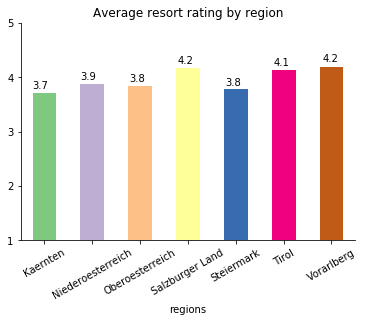

In [9]:
ax = ratings_by_region.plot.bar(legend=False, rot=30, #no legend, rotating X
                               color=[plt.cm.Accent(np.arange(len(ratings_by_region)))], 
                               ylim=(1,5), yticks=[1,2,3,4,5],
                               title='Average resort rating by region')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() * 1.01, p.get_height() * 1.02))
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Correlates of resort ratings

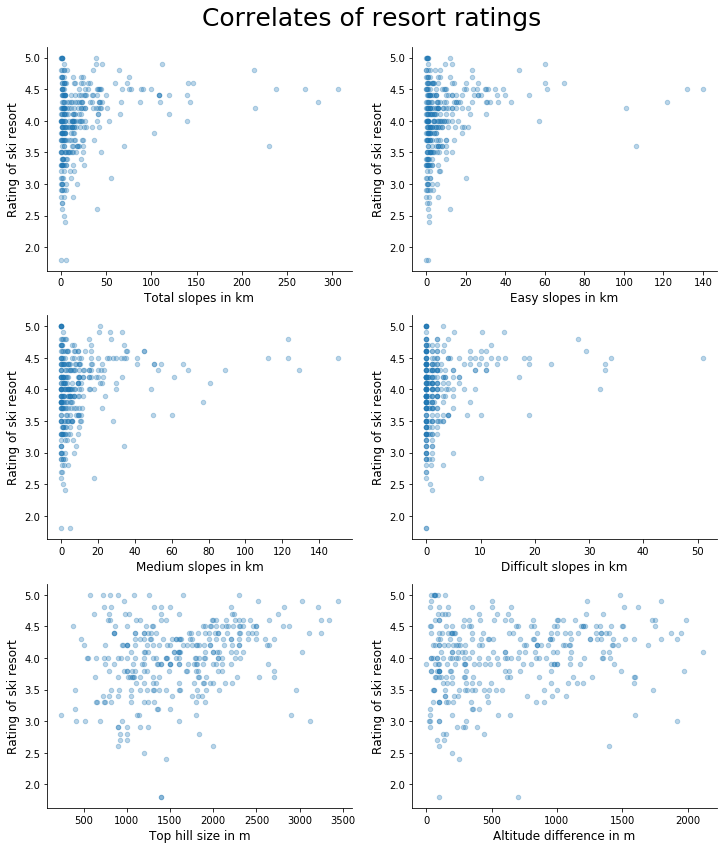

In [15]:
cols = ['total', 'easy', 'medium', 'difficult', 'top', 'diff'] #display relationship between rating and these columns

x_labels = ["Total slopes in km",
           "Easy slopes in km",
           "Medium slopes in km",
           "Difficult slopes in km",
           "Mountain peak in m",
           "Altitude difference in m"]

fig = plt.figure(figsize=(12,14)) # set figure and corresponding plots
ax1 = fig.add_subplot(3,2,1)      
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

for col, label, ax in zip(cols, x_labels, [ax1,ax2,ax3,ax4,ax5,ax6]):
    resorts.plot.scatter(col, 'rating', alpha=0.3, ax=ax) # scatter plots
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel("Rating of ski resort", fontsize=12)
    ax.spines['right'].set_visible(False) # remove right edge of plots
    ax.spines['top'].set_visible(False) # remove upper edge of plots

    plt.suptitle('Correlates of resort ratings', fontsize=25, y=0.92) # overall figure title

There seems to be only small relationships between different aspects of size of ski resorts and the ratings.

# Slope lengths

### Average slope lengths of ski resorts by region

In [10]:
avg_slopes_by_region = pd.pivot_table(resorts, values='total', index='regions', aggfunc='mean')
avg_slopes_by_region

,total
regions,
Kaernten,26.174074
Niederoesterreich,5.574194
Oberoesterreich,6.900000
Salzburger Land,44.100000
Steiermark,7.869841
Tirol,34.556604
Vorarlberg,25.002857


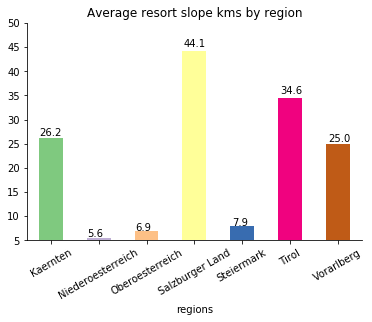

In [11]:
ax = avg_slopes_by_region.plot.bar(legend=False, rot=30, #no legend, rotating X
                               color=[plt.cm.Accent(np.arange(len(avg_slopes_by_region)))], # Accent colormap for bars
                               ylim=(5,50), yticks=list(range(5,51,5)), # y-axis
                               title='Average resort slope kms by region') # title of figure
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() * 1.01, p.get_height() * 1.02)) # annotate bars
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Total slope lengths by region

In [12]:
sum_slopes_by_region = pd.pivot_table(resorts, values='total', index='regions', aggfunc='sum')
sum_slopes_by_region

,total
regions,
Kaernten,706.7
Niederoesterreich,172.8
Oberoesterreich,186.3
Salzburger Land,1940.4
Steiermark,495.8
Tirol,3663.0
Vorarlberg,875.1


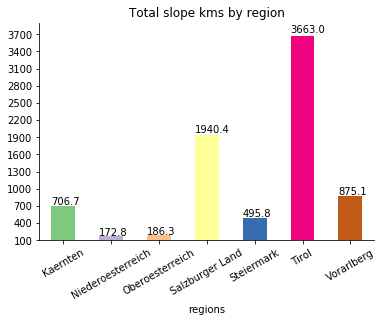

In [27]:
ax = sum_slopes_by_region.plot.bar(legend=False, rot=30, #no legend, rotating X
                               color=[plt.cm.Accent(np.arange(len(sum_slopes_by_region)))], 
                               ylim=(100,3900), yticks=list(range(100,3701,300)),
                               title='Total slope kms by region')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() * 1.00001, p.get_height() * 1.02))
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Distribution of slopes between easy, medium, difficult slopes
### Average distribution of slopes per region

In [6]:
mean_slopes = resorts[["regions", "easy", "medium", "difficult"]].groupby(['regions']).mean()
mean_slopes

,easy,medium,difficult
regions,,,
Kaernten,7.859259,15.325926,2.840741
Niederoesterreich,2.406452,2.400000,0.645161
Oberoesterreich,3.092593,2.892593,0.777778
Salzburger Land,19.515909,18.400000,4.161364
Steiermark,3.446032,3.252381,0.763492
Tirol,12.302830,15.799057,4.577358
Vorarlberg,9.280000,10.174286,2.422857


In [7]:
mean_slopes_T = mean_slopes.transpose()
mean_slopes_T

regions,Kaernten,Niederoesterreich,Oberoesterreich,Salzburger Land,Steiermark,Tirol,Vorarlberg
easy,7.859259,2.406452,3.092593,19.515909,3.446032,12.302830,9.280000
medium,15.325926,2.400000,2.892593,18.400000,3.252381,15.799057,10.174286
difficult,2.840741,0.645161,0.777778,4.161364,0.763492,4.577358,2.422857


Text(0.5, 0.92, 'Average distribution of slopes per region')

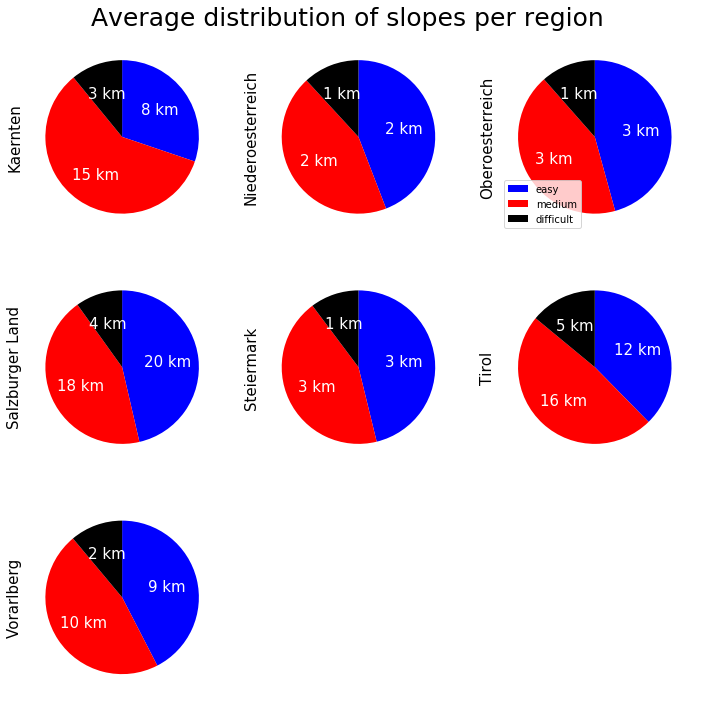

In [78]:
fig = plt.figure(figsize=(12,12)) # define figure and subplots displaying 
ax1 = fig.add_subplot(3,3,1)      # respective pie plots of average distribution of slopes per region
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)



for col, ax in zip(mean_slopes_T.columns, [ax1,ax2,ax3,ax4,ax5,ax6,ax7]):

    total = mean_slopes_T[col].sum()
    if ax==ax3: # display of legend at upper right subplot
        mean_slopes_T[col].plot.pie(labels=None, colors=['blue', 'red', 'black'], ##no labels, wedges colors,
                                  counterclock=False, startangle=90, legend=True, #start of wedges, display of legend
                                  autopct=lambda p: '{:.0f} km'.format(p*total/100), #display total values
                                  fontsize=15, textprops={'color':"w"}, #fontsize, white labels
                                  ax=ax) 
        ax.set_ylabel(col, fontsize=15)
        
    else:
        mean_slopes_T[col].plot.pie(labels=None, colors=['blue', 'red', 'black'], #no labels, wedges colors, 
                                  counterclock=False, startangle=90, legend=False, #start of wedges, display of legend
                                  autopct=lambda p: '{:.0f} km'.format(p*total/100), #display total values
                                  fontsize=15, textprops={'color':"w"}, #wedges labels, fontsize, white labels
                                  ax=ax) 
        ax.set_ylabel(col, fontsize=15)   
    
    
plt.suptitle('Average distribution of slopes per region', fontsize=25, y=0.92) #Overall Title of Figure



### Total distribution of slopes per region

In [11]:
total_slopes = resorts[["regions", "easy", "medium", "difficult"]].groupby(['regions']).sum()
total_slopes

,easy,medium,difficult
regions,,,
Kaernten,212.2,413.8,76.7
Niederoesterreich,74.6,74.4,20.0
Oberoesterreich,83.5,78.1,21.0
Salzburger Land,858.7,809.6,183.1
Steiermark,217.1,204.9,48.1
Tirol,1304.1,1674.7,485.2
Vorarlberg,324.8,356.1,84.8


In [12]:
total_slopes_T = total_slopes.transpose()
total_slopes_T

regions,Kaernten,Niederoesterreich,Oberoesterreich,Salzburger Land,Steiermark,Tirol,Vorarlberg
easy,212.2,74.6,83.5,858.7,217.1,1304.1,324.8
medium,413.8,74.4,78.1,809.6,204.9,1674.7,356.1
difficult,76.7,20.0,21.0,183.1,48.1,485.2,84.8


Text(0.5, 0.92, 'Distribution of total slopes per region')

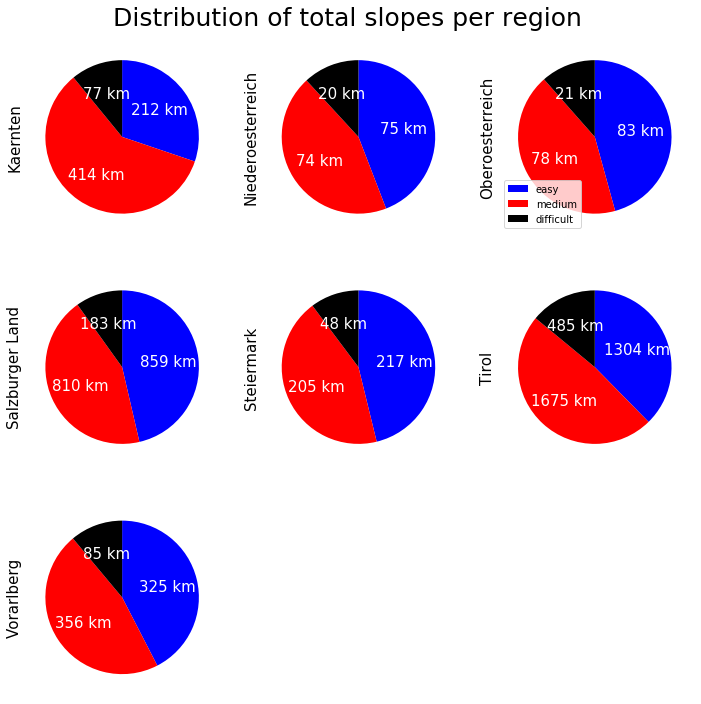

In [14]:
fig = plt.figure(figsize=(12,12)) # define figure and subplots displaying 
ax1 = fig.add_subplot(3,3,1)      # respective pie plots of average distribution of slopes per region
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)



for col, ax in zip(total_slopes_T.columns, [ax1,ax2,ax3,ax4,ax5,ax6,ax7]):

    total = total_slopes_T[col].sum()
    if ax==ax3: # display of legend at upper right subplot
        total_slopes_T[col].plot.pie(labels=None, colors=['blue', 'red', 'black'], ##no labels, wedges colors,
                                  counterclock=False, startangle=90, legend=True, #start of wedges, display of legend
                                  autopct=lambda p: '{:.0f} km'.format(p*total/100), #display total values
                                  fontsize=15, textprops={'color':"w"}, #fontsize, white labels
                                  ax=ax) 
        ax.set_ylabel(col, fontsize=15)
        
    else:
        total_slopes_T[col].plot.pie(labels=None, colors=['blue', 'red', 'black'], #no labels, wedges colors, 
                                  counterclock=False, startangle=90, legend=False, #start of wedges, display of legend
                                  autopct=lambda p: '{:.0f} km'.format(p*total/100), #display total values
                                  fontsize=15, textprops={'color':"w"}, #wedges labels, fontsize, white labels
                                  ax=ax) 
        ax.set_ylabel(col, fontsize=15)   
    
    
plt.suptitle('Distribution of total slopes per region', fontsize=25, y=0.92) #Overall Title of Figure

# Altitude of Ski Resorts

### Average altitude of highest points of ski resorts

In [12]:
avg_top_by_region = pd.pivot_table(resorts, values='top', index='regions', aggfunc='mean')
avg_top_by_region

,top
regions,
Kaernten,1883.777778
Niederoesterreich,1054.645161
Oberoesterreich,1032.851852
Salzburger Land,1760.255814
Steiermark,1338.761905
Tirol,1886.943396
Vorarlberg,1583.941176


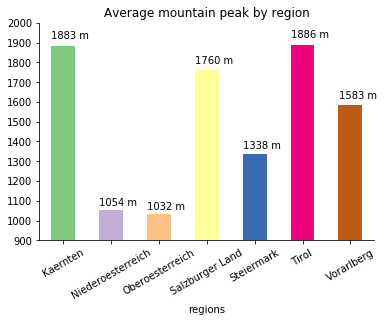

In [13]:
ax = avg_top_by_region.plot.bar(legend=False, rot=30, #no legend, rotating X
                               color=[plt.cm.Accent(np.arange(len(avg_top_by_region)))], 
                               ylim=(900,2000), yticks=list(range(900,2001,100)),
                               title='Average mountain peak by region')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()))+" m", (p.get_x() * 1.001, p.get_height() * 1.02))
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Average altitude of lowest points of ski resorts

In [85]:
avg_valley_by_region = pd.pivot_table(resorts, values='valley', index='regions', aggfunc='mean')
avg_valley_by_region

,valley
regions,
Kaernten,1136.185185
Niederoesterreich,779.645161
Oberoesterreich,703.888889
Salzburger Land,921.954545
Steiermark,971.571429
Tirol,1083.188679
Vorarlberg,911.142857


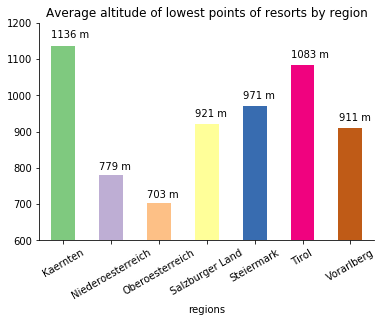

In [86]:
ax = avg_valley_by_region.plot.bar(legend=False, rot=30, #no legend, rotating X
                               color=[plt.cm.Accent(np.arange(len(avg_valley_by_region)))], 
                               ylim=(600,1200), yticks=list(range(600,1201,100)),
                               title='Average altitude of lowest points of resorts by region')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()))+" m", (p.get_x() * 1.001, p.get_height() * 1.02))
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Average altitude difference of ski resorts by region

In [81]:
avg_diff_by_region = pd.pivot_table(resorts, values='diff', index='regions', aggfunc='mean')
avg_diff_by_region

,diff
regions,
Kaernten,747.592593
Niederoesterreich,275.000000
Oberoesterreich,328.962963
Salzburger Land,834.488372
Steiermark,367.190476
Tirol,803.754717
Vorarlberg,669.529412


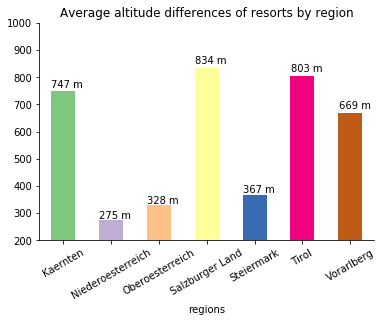

In [82]:
ax = avg_diff_by_region.plot.bar(legend=False, rot=30, #no legend, rotating X
                               color=[plt.cm.Accent(np.arange(len(avg_diff_by_region)))], 
                               ylim=(200,1000), yticks=list(range(200,1001,100)),
                               title='Average altitude differences of resorts by region')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()))+" m", (p.get_x() * 1.001, p.get_height() * 1.02))
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Prices of Ski Resorts

### Average prices of ski resorts by region

In [21]:
avg_price_by_region = pd.pivot_table(resorts, values='prices', index='regions', aggfunc='mean')
avg_price_by_region

,prices
regions,
Kaernten,34.673077
Niederoesterreich,24.934783
Oberoesterreich,26.800000
Salzburger Land,40.329268
Steiermark,27.784314
Tirol,38.185106
Vorarlberg,33.793548


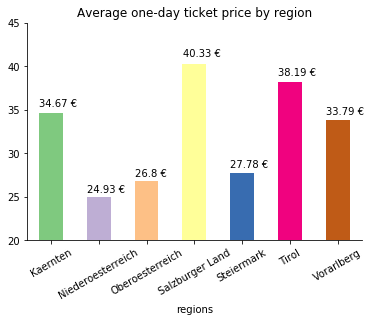

In [22]:
ax = avg_price_by_region.plot.bar(legend=False, rot=30, #no legend, rotating X
                               color=[plt.cm.Accent(np.arange(len(avg_price_by_region)))], 
                               ylim=(20,45), yticks=list(range(20,46,5)),
                               title='Average one-day ticket price by region')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+" €", (p.get_x() * 1.001, p.get_height() * 1.02))
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Correlates of Price

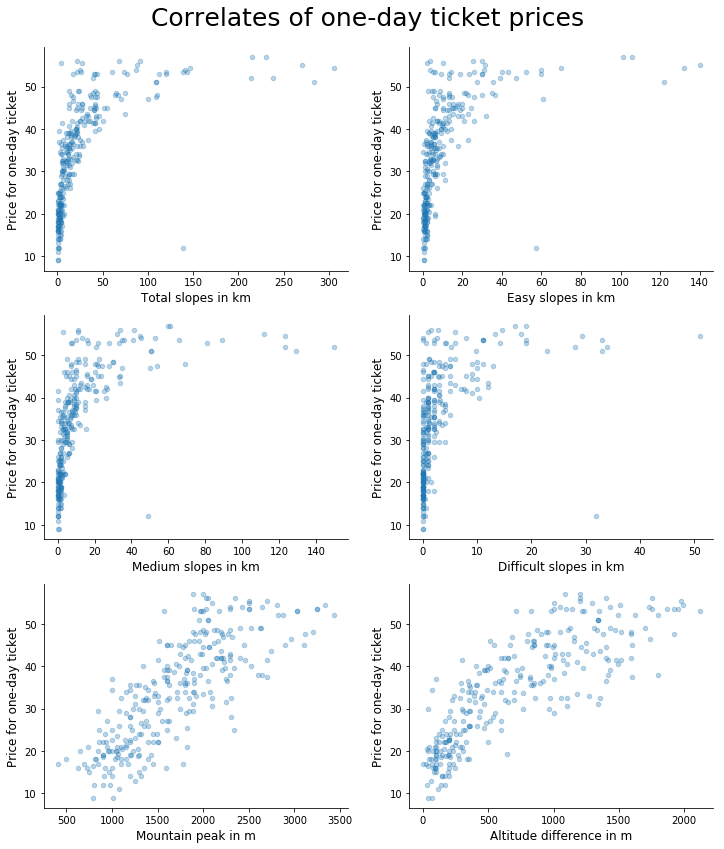

In [9]:
cols = ['total', 'easy', 'medium', 'difficult', 'top', 'diff']

x_labels = ["Total slopes in km",
           "Easy slopes in km",
           "Medium slopes in km",
           "Difficult slopes in km",
           "Mountain peak in m",
           "Altitude difference in m"]

fig = plt.figure(figsize=(12,14))
ax1 = fig.add_subplot(3,2,1)      
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

for col, label, ax in zip(cols, x_labels, [ax1,ax2,ax3,ax4,ax5,ax6]):
    resorts.plot.scatter(col, 'prices', alpha=0.3, ax=ax)
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel("Price for one-day ticket", fontsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.suptitle('Correlates of one-day ticket prices', fontsize=25, y=0.92)